In [10]:
import numpy as np
import matplotlib.pyplot as plt
import csv

Code pour lire le fichier csv et ajouter les données des bonnes collones dans la bonne liste.

In [16]:
seconds = []
volts_2 = []

# Open the file in read mode
with open('../TPOP/TPOP-donnees/clemon_1.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    # Read each line of the file
    for line in reader:
        # Add elements of each column to the corresponding list
        seconds.append(line[0])
        volts_2.append(line[2])

Convertir les listes de chaînes en listes de nombres flottants et ignorer les deux premières lignes


In [17]:
seconds = [float(i) for i in seconds[150:600]]
volts_2 = [float(i) for i in volts_2[150:600]]

Ensuite, il est possible grace à la librairie numpy de filtrer les valeurs. Les valeurs filtrées sont mises dans une nouvelle liste.

In [18]:
window_size = 50
filtered_volts_2 = np.convolve(volts_2, np.ones(window_size) / window_size, mode='same')
real_value = filtered_volts_2[25:-25]

Finalement, les données peuvent être mises sur un graphique.

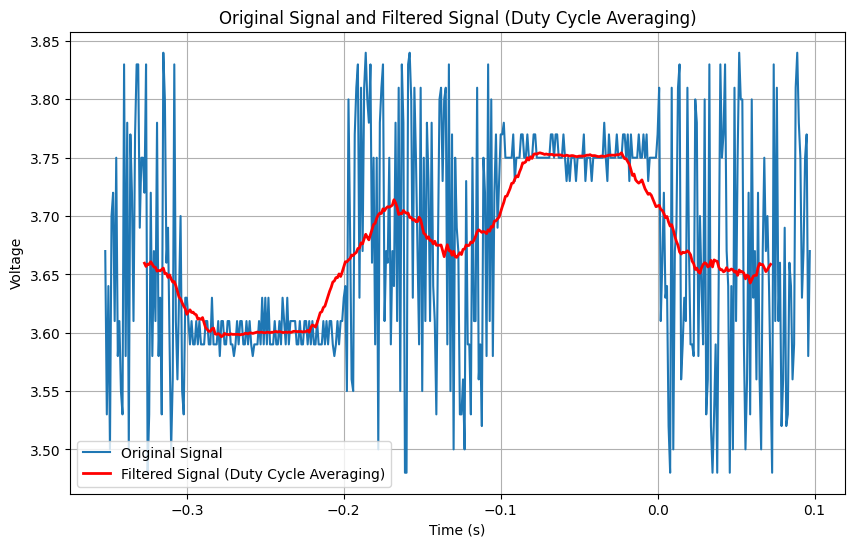

In [19]:
# Signal brut de l'oscilloscope
plt.figure(figsize=(10, 6))
plt.plot(seconds, volts_2, label='Original Signal')

# Signal filtré
plt.plot(seconds[25:-25], real_value, 'r-', linewidth=2, label='Filtered Signal (Duty Cycle Averaging)')
plt.xlabel('Time (s)')
plt.ylabel('Voltage')
plt.title('Original Signal and Filtered Signal (Duty Cycle Averaging)')
plt.legend()
plt.grid(True)
plt.show()
